## Post Analysis of Genes Surrounding SV's in MB Samples

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
def load_samples(sample_names: list, folder_path: str) -> pd.DataFrame:
    """
    Loads all samples given a path and sample list. Expecting CSV Format.
    
    Args:
        sample_names (list): list of samples EX: [MB102, MB103, etc..]
        folder_path (str): path to folder containing samples

    Returns:
        merged_samples (pd.DataFrame): Pandas dataframe containing all samples merged
    """
    merged_samples = pd.DataFrame()
    for sample in sample_names:
        temp_df = pd.read_csv(f"{folder_path}/{sample}_genes.csv")
        temp_df['sample'] = sample
        merged_samples = pd.concat([merged_samples, temp_df]).ffill()
    
    return merged_samples
    


In [7]:
sample_list = [
    'MB106', 'MB164','MB174', 'MB199', 'MB227', 'MB244',
    'MB248', 'MB274'
]
folder_path = '/Users/jkirkland/2023_chavez_rotation/data/gene_analysis'
all_samples = load_samples(sample_list, folder_path)
all_samples.head()

,gene,MB095,MB106,MB170,MB226,MB247,MB248,MB260,MB164,MB166,...,end,strand,gene_id,gene_type,level,hgnc_id,havana_gene,expression_mean,expression_std,sample
0,CD38,244.666782,101.242743,109.466571,72.435747,194.957298,102.344722,140.743489,137.043816,338.102519,...,15853232,+,ENSG00000004468.13,protein_coding,2,HGNC:1667,OTTHUMG00000048206.6,211.682570,230.080875,MB106
1,CSF2RA,605.728442,200.519608,1267.185024,133.323767,161.536047,318.664247,206.926439,150.748198,360.554639,...,1310381,+,ENSG00000198223.17,protein_coding,2,HGNC:2435,OTTHUMG00000012533.8,338.573344,231.411994,MB106
2,ZBED1,6986.068029,4140.140149,6880.630776,9614.008309,7770.440891,5159.104382,11360.010163,8309.423386,5924.718354,...,2500976,-,ENSG00000214717.12,protein_coding,2,HGNC:447,OTTHUMG00000021069.10,6689.976576,2032.286672,MB106
3,DHRSX-IT1,49.883519,8.846453,28.023442,26.244836,32.307209,22.097156,28.483801,7.613545,9.244991,...,2336410,-,ENSG00000223571.6,lncRNA,2,HGNC:38713,OTTHUMG00000067406.1,16.034791,11.012698,MB106
4,ZFY-AS1,0.000000,4.914696,2.627198,4.199174,0.000000,0.000000,3.351035,0.000000,0.000000,...,3002626,-,ENSG00000233070.1,lncRNA,2,HGNC:38798,OTTHUMG00000036156.1,1.272683,2.050582,MB106


In [14]:
import pandas as pd

gene_counts = all_samples['gene'].value_counts()
genes_more_than_one = gene_counts[gene_counts > 1].index.tolist()
genes_lone = gene_counts[gene_counts == 1].index.tolist()
gene_sample_dict = {}
for gene in genes_more_than_one:
    samples_with_gene = all_samples[all_samples['gene'] == gene]['sample'].unique().tolist()
    gene_sample_dict[gene] = samples_with_gene

gene_sample_df = pd.DataFrame(list(gene_sample_dict.items()), columns=['Gene', 'Samples'])


In [21]:
len(genes_lone)

62

In [11]:
gene_sample_df

,Gene,Samples
0,ZBED1,"[MB106, MB164, MB174, MB199, MB244, MB274]"
1,DHRSX-IT1,"[MB106, MB164, MB174, MB199, MB244, MB274]"
2,CSF2RA,"[MB106, MB164, MB174, MB199, MB244, MB274]"
3,ZFY-AS1,"[MB106, MB174, MB274]"
4,FAM72B,"[MB174, MB248]"


In [29]:
mb164_genes = pd.read_csv("/Users/jkirkland/2023_chavez_rotation/data/gene_analysis/MB164_gene_export.csv")


In [26]:
df_transposed

gene,ZIC1,MYC,HOXB8,HOXB7
MB095,39599.199960,13179.938270,369.375579,1279.155945
MB106,750.965592,42578.962720,0.000000,3.931757
MB170,1798.754692,16792.171960,17.514651,694.455925
MB226,53582.506890,35517.661400,272.946294,686.564909
MB247,94165.489140,15619.978740,2.228083,1.114042
MB248,35850.890820,26038.590630,0.000000,4.652033
MB260,13485.404400,82600.510480,0.000000,25.132766
MB164,122195.880000,7832.815447,0.000000,1.522709
MB166,157485.775900,825.445602,1.320713,5.282852
MB271,114131.024400,3316.582108,5.561625,0.926937


<Figure size 1200x600 with 0 Axes>

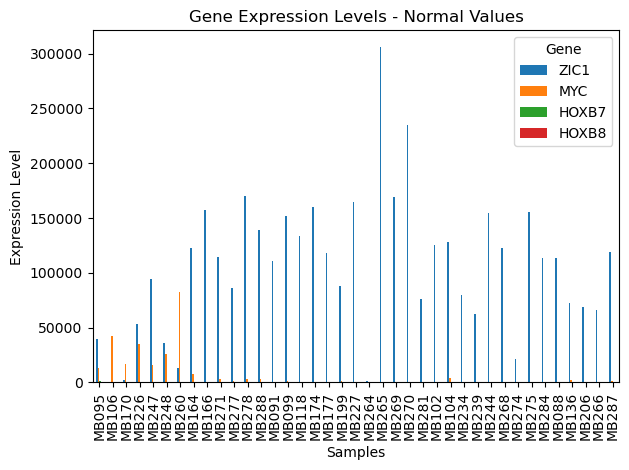

<Figure size 1200x600 with 0 Axes>

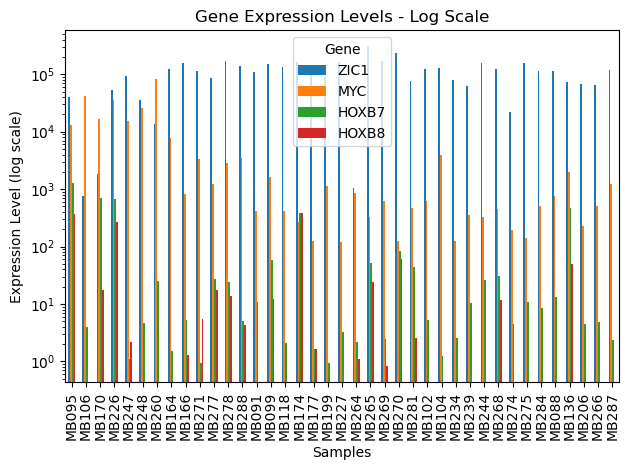

In [30]:
df = mb164_genes

df.set_index('gene', inplace=True)

df_transposed = df.transpose()

df_sorted = df_transposed.sum(axis=0).sort_values(ascending=False)
df_sorted_columns = df_sorted.index

df_transposed_sorted = df_transposed[df_sorted_columns]

plt.figure(figsize=(12, 6))
df_transposed_sorted.plot(kind='bar')
plt.title('Gene Expression Levels - Normal Values')
plt.ylabel('Expression Level')
plt.xlabel('Samples')
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.legend(title='Gene')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
df_transposed_sorted.plot(kind='bar', logy=True)
plt.title('Gene Expression Levels - Log Scale')
plt.ylabel('Expression Level (log scale)')
plt.xlabel('Samples')
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.legend(title='Gene')
plt.tight_layout()
plt.show()